# MAC0460 / MAC5832 (2020)
<hr>

## EP5

# Parte 1: Preparação dos dados

### Importar conjunto de dados e separar em conjunto de testes e treinamento

In [47]:
from tensorflow.keras.datasets import mnist

(X_train_all, y_train_all), (X_test_all, y_test_all) = mnist.load_data()

### Reshape nos dados e normalização para valores entre 0 e 1

In [48]:
import numpy as np

n_feat = X_train_all.shape[1] * X_train_all.shape[2]

X_train_features = X_train_all.reshape(X_train_all.shape[0], n_feat).astype('float64')
X_test_features  = X_test_all.reshape(X_test_all.shape[0], n_feat).astype('float64')

X_train_features = np.true_divide(X_train_features, 255.0)
X_test_features = np.true_divide(X_test_features, 255.0)

### Criando o conjunto de treinamento reduzido com 2000 exemplos de cada classe

In [49]:
unique = np.unique(y_train_all)

conjuntos_separados = []
for i in unique:
    conjuntos_separados.append(X_train_features[y_train_all == i])

for i in range(len(conjuntos_separados)):
    shape = conjuntos_separados[i].shape[0]
    conjuntos_separados[i] = conjuntos_separados[i][np.random.choice(shape, 2000, replace=False)]
    
y_train = np.concatenate([i*np.ones(2000) for i in range(len(unique))]).astype('uint8')
X_train = np.concatenate(conjuntos_separados, axis = 0)

np.random.seed(56789)
def shuffle(X, y):
    # input and output must be shuffled equally
    perm = np.random.permutation(len(X))
    return X[perm], y[perm]

X_train, y_train = shuffle(X_train, y_train)
X_test = X_test_features
y_test = y_test_all

X_train_all = X_train_features
X_test_all = X_test_features

### Printando informações sobre os conjuntos

In [50]:
print("X_train, y_train, X_test, y_test")
print("dtype: ", X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype)
print("shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print("minimum: ", np.amin(X_train),np.amin(y_train),np.amin(X_test),np.amin(y_test))
print("maximum: ", np.amax(X_train),np.amax(y_train),np.amax(X_test),np.amax(y_test))

X_train, y_train, X_test, y_test
dtype:  float64 uint8 float64 uint8
shape:  (20000, 784) (20000,) (10000, 784) (10000,)
minimum:  0.0 0 0.0 0
maximum:  1.0 9 1.0 9


### Três exemplos aleatórios

Exemplos:  [3661 4218 4104]


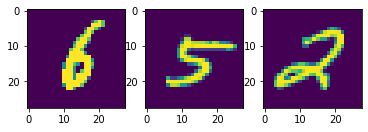

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

ind = np.random.randint(X_train.shape[0], size=3)

print("Exemplos: ", ind)

f, axarr = plt.subplots(1,3)
aux = 0
for i in ind:
    axarr[aux].imshow(X_train[i].reshape(28,28))
    aux = aux + 1
    
plt.show()

# Parte 2: Seleção dos modelos

### Frequencia de classes em cada fold

In [52]:
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from keras import models
from keras import layers


skf = StratifiedKFold(n_splits=5)


split = list(skf.split(X_train, y_train))

print("Classes:\t",list(range(10)))

aux = 0
for train_index, test_index in split:
    print("Fold:",aux)
    unique, counts = np.unique(y_train[train_index], return_counts=True)
    print("\tTreino:\t", counts)
    
    unique, counts = np.unique(y_train[test_index], return_counts=True)
    print("\tTeste:\t", counts)
    aux += 1

Classes:	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Fold: 0
	Treino:	 [1600 1600 1600 1600 1600 1600 1600 1600 1600 1600]
	Teste:	 [400 400 400 400 400 400 400 400 400 400]
Fold: 1
	Treino:	 [1600 1600 1600 1600 1600 1600 1600 1600 1600 1600]
	Teste:	 [400 400 400 400 400 400 400 400 400 400]
Fold: 2
	Treino:	 [1600 1600 1600 1600 1600 1600 1600 1600 1600 1600]
	Teste:	 [400 400 400 400 400 400 400 400 400 400]
Fold: 3
	Treino:	 [1600 1600 1600 1600 1600 1600 1600 1600 1600 1600]
	Teste:	 [400 400 400 400 400 400 400 400 400 400]
Fold: 4
	Treino:	 [1600 1600 1600 1600 1600 1600 1600 1600 1600 1600]
	Teste:	 [400 400 400 400 400 400 400 400 400 400]


### Fazendo Kfold para cada um dos três modelos e printando acurácia para cada fold e acurácia média final

In [35]:
from keras import models
from keras import layers
from keras.utils import to_categorical

##Modelo do do site de referência
print("Modelo 1:")

cvscores = []
num_epocas = 5
batch_size = 128

for train_index, test_index in split:
    network = models.Sequential()
    network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation='softmax'))

    network.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    X_treino, X_validacao = X_train[train_index], X_train[test_index]
    y_treino, y_validacao = y_train[train_index], y_train[test_index]
    
    y_treino = to_categorical(y_treino)
    y_validacao = to_categorical(y_validacao)

    history = network.fit(X_treino, y_treino, epochs=num_epocas, batch_size=batch_size, verbose=0)
    
    scores = network.evaluate(X_validacao, y_validacao)
    
    cvscores.append(scores[1])

print("Acurácia média Modelo 1= ",np.mean(cvscores))


print("Modelo 2:")
##Modelo 2########################################
cvscores = []
for train_index, test_index in split:
    
    print("oq")
    network = models.Sequential()
    network.add(layers.Dense(728, activation='sigmoid', input_shape=(28 * 28,)))
    network.add(layers.Dense(512, activation='relu'))
    network.add(layers.Dense(10, activation='softmax'))

    network.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    X_treino, X_validacao = X_train[train_index], X_train[test_index]
    y_treino, y_validacao = y_train[train_index], y_train[test_index]
    
    y_treino = to_categorical(y_treino)
    y_validacao = to_categorical(y_validacao)

    history = network.fit(X_treino, y_treino, epochs=num_epocas, batch_size=batch_size, verbose=0)
    
    scores = network.evaluate(X_validacao, y_validacao)
    
    cvscores.append(scores[1])

print("Acurácia média Modelo 2= ",np.mean(cvscores),"\n\n")


print("Modelo 3:")
#Modelo 3######################################
cvscores = []
for train_index, test_index in split:
    network = models.Sequential()
    network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
    network.add(layers.Dense(400, activation='relu'))
    network.add(layers.Dense(100, activation='relu'))
    network.add(layers.Dense(50, activation='relu')) 
    network.add(layers.Dense(10, activation='softmax'))

    network.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    X_treino, X_validacao = X_train[train_index], X_train[test_index]
    y_treino, y_validacao = y_train[train_index], y_train[test_index]
    
    y_treino = to_categorical(y_treino)
    y_validacao = to_categorical(y_validacao)

    history = network.fit(X_treino, y_treino, epochs=num_epocas, batch_size=batch_size, verbose=0)
    
    scores = network.evaluate(X_validacao, y_validacao)
    
    cvscores.append(scores[1])

print("Acurácia média Modelo 3= ",np.mean(cvscores),"\n\n")

Modelo 1:
125/125 [==============================] - 0s 1ms/step - loss: 0.1403 - accuracy: 0.9567
Acurácia média Modelo 1=  0.9590499997138977
Modelo 2:
oq
125/125 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.9273
oq
125/125 [==============================] - 0s 1ms/step - loss: 0.2301 - accuracy: 0.9333
oq
125/125 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9355
oq
125/125 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9383
oq
125/125 [==============================] - 0s 2ms/step - loss: 0.2218 - accuracy: 0.9320
Acurácia média Modelo 2=  0.9332500100135803 


Modelo 3:
125/125 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 0.9647
Acurácia média Modelo 3=  0.9651999950408936 




### Modelo 3 escolhido usando o critério de maior acurácia média no conjunto de validação

# Parte 3: Avaliando o Modelo Escolhido

#### Agora definindo o Modelo 3

In [53]:
modelo3 = models.Sequential()
modelo3.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
modelo3.add(layers.Dense(512, activation='relu'))
modelo3.add(layers.Dense(400, activation='relu'))
modelo3.add(layers.Dense(50, activation='sigmoid')) 
modelo3.add(layers.Dense(10, activation='softmax'))

modelo3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Ajustando o modelo para o conjunto de treinamento completo

In [65]:
#ajustando aos dados de treino
#y_train_all = to_categorical(y_train_all)
history = modelo3.fit(X_train_all, to_categorical(y_train_all), epochs=num_epocas, batch_size=batch_size, verbose=0)

print(history.history.keys())

dict_keys(['loss', 'accuracy'])


### Curva de aprendizado e scores finais no conjunto de treinamento

Acurácia final no conjunto de treinamento:	 0.9971666932106018
Loss final no conjunto de treinamento:	 0.011731689795851707


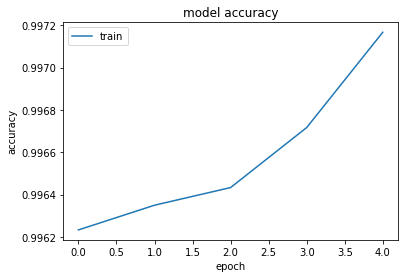

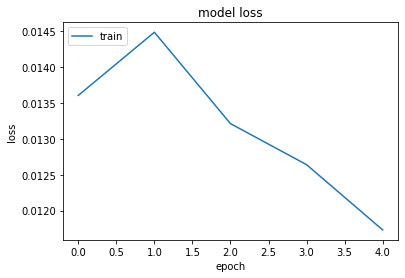

In [71]:
#printando a curva de aprendizado

import matplotlib.pyplot as plt

print("Acurácia final no conjunto de treinamento:\t", history.history['accuracy'][-1])
print("Loss final no conjunto de treinamento:\t", history.history['loss'][-1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#print(scores[0])

### Plotando a frequência de cada classe no conjunto de testes completo

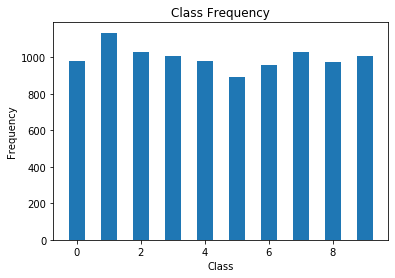

In [79]:
unique, counts = np.unique(y_test_all, return_counts=True)
plt.bar(unique, counts, 0.5)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### Avaliando o modelo 3 no conjunto de testes

In [80]:
scores = modelo3.evaluate(X_test_all, to_categorical(y_test_all),verbose = 0)

print('Teste loss:\t', scores[0]) 
print('Teste acurácia:\t', scores[1])

Teste loss:	 0.10714507848024368
Teste acurácia:	 0.983299970626831


### Plotando Matriz de Confusão em relação ao conjunto de testes

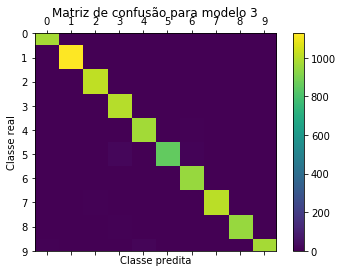

In [121]:
y_pred = np.argmax(modelo3.predict(X_test_all), axis=-1)

from sklearn.metrics import confusion_matrix

labels = list(range(10))
cm = confusion_matrix(y_test_all, y_pred, labels)

fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(cm)
plt.title('Matriz de confusão para modelo 3')
fig.colorbar(cax)

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xticks(labels)
ax.set_yticks(labels)

plt.xlabel('Classe predita')
plt.ylabel('Classe real')
plt.show()